### Importing libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

### loading the data

In [11]:
data = pd.read_csv("kidney_disease.csv")
data.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


### Data analysis

In [4]:
data.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [12]:
data = data.dropna(axis = 0)

In [13]:
data[["htn","dm","cad","appet","pe","ane"]] = data[["htn","dm","cad","appet","pe","ane"]].replace(["yes","no","poor","good"],[1,0,0,1])

In [14]:
data.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,1,0,0,0,1,1,ckd
9,9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,...,29,12100,3.7,1,1,0,0,0,1,ckd
11,11,63.0,70.0,1.010,3.0,0.0,abnormal,abnormal,present,notpresent,...,32,4500,3.8,1,1,0,0,1,0,ckd
14,14,68.0,80.0,1.010,3.0,2.0,normal,abnormal,present,present,...,16,11000,2.6,1,1,1,0,1,0,ckd
20,20,61.0,80.0,1.015,2.0,0.0,abnormal,abnormal,notpresent,notpresent,...,24,9200,3.2,1,1,1,0,1,1,ckd


In [24]:
data.keys()

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [22]:
data["pc"].value_counts()

normal      129
abnormal     29
Name: pc, dtype: int64

In [25]:
data["rbc"].value_counts()

normal      140
abnormal     18
Name: rbc, dtype: int64

In [26]:
data["pcc"].value_counts()

notpresent    144
present        14
Name: pcc, dtype: int64

In [23]:
data["ba"].value_counts()

notpresent    146
present        12
Name: ba, dtype: int64

In [27]:
data["bgr"].value_counts()

117.0    5
100.0    5
132.0    4
70.0     4
131.0    4
        ..
134.0    1
303.0    1
98.0     1
273.0    1
114.0    1
Name: bgr, Length: 78, dtype: int64

In [28]:
data["bu"].value_counts()

46.0     8
25.0     7
38.0     6
18.0     6
17.0     5
        ..
158.0    1
67.0     1
58.0     1
52.0     1
56.0     1
Name: bu, Length: 66, dtype: int64

In [29]:
data["sc"].value_counts()

1.2     26
0.5     17
0.7     14
1.1     14
0.6     12
0.9     12
0.8     11
1.0     10
1.7      5
2.7      3
3.2      2
3.9      2
7.2      2
5.6      2
5.3      2
9.2      1
0.4      1
11.9     1
4.1      1
12.0     1
15.0     1
4.6      1
3.3      1
3.8      1
2.6      1
2.3      1
14.2     1
15.2     1
2.2      1
11.8     1
7.7      1
4.3      1
6.3      1
12.8     1
6.7      1
13.3     1
3.6      1
1.3      1
8.5      1
Name: sc, dtype: int64

In [30]:
data["sod"].value_counts()

135.0    22
147.0    12
150.0    12
140.0    11
142.0    10
139.0    10
136.0     9
141.0     9
144.0     8
138.0     8
137.0     8
145.0     6
146.0     6
143.0     4
132.0     3
130.0     3
131.0     3
122.0     2
133.0     2
120.0     2
125.0     2
114.0     2
134.0     1
115.0     1
124.0     1
111.0     1
Name: sod, dtype: int64

In [31]:
data["pot"].value_counts()

3.5     23
5.0     23
4.9     16
4.7     11
3.9      8
4.8      8
4.5      7
3.8      7
3.7      7
4.0      6
3.6      5
4.4      4
4.6      4
4.1      3
5.7      3
4.3      3
3.3      2
4.2      2
2.9      2
5.2      2
3.2      1
6.4      1
5.6      1
7.6      1
5.8      1
6.5      1
3.0      1
47.0     1
3.4      1
5.5      1
5.4      1
2.5      1
Name: pot, dtype: int64

In [32]:
data["hemo"].value_counts()

15.0    10
13.6     6
13.9     5
13.0     4
13.5     3
        ..
10.8     1
7.3      1
9.6      1
16.6     1
17.2     1
Name: hemo, Length: 80, dtype: int64

In [33]:
data[["pc","pcc","rbc","ba"]] = data[["pc","pcc","rbc","ba"]].replace(["normal","abnormal","present","notpresent"],[0,1,1,0])

In [34]:
data.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
3,3,48.0,70.0,1.005,4.0,0.0,0,1,1,0,...,32,6700,3.9,1,0,0,0,1,1,ckd
9,9,53.0,90.0,1.020,2.0,0.0,1,1,1,0,...,29,12100,3.7,1,1,0,0,0,1,ckd
11,11,63.0,70.0,1.010,3.0,0.0,1,1,1,0,...,32,4500,3.8,1,1,0,0,1,0,ckd
14,14,68.0,80.0,1.010,3.0,2.0,0,1,1,1,...,16,11000,2.6,1,1,1,0,1,0,ckd
20,20,61.0,80.0,1.015,2.0,0.0,1,1,0,0,...,24,9200,3.2,1,1,1,0,1,1,ckd


In [35]:
data["classification"].value_counts()

notckd    115
ckd        43
Name: classification, dtype: int64

In [37]:
data["classification"] = data["classification"].replace(["ckd","notckd"],[1,0])

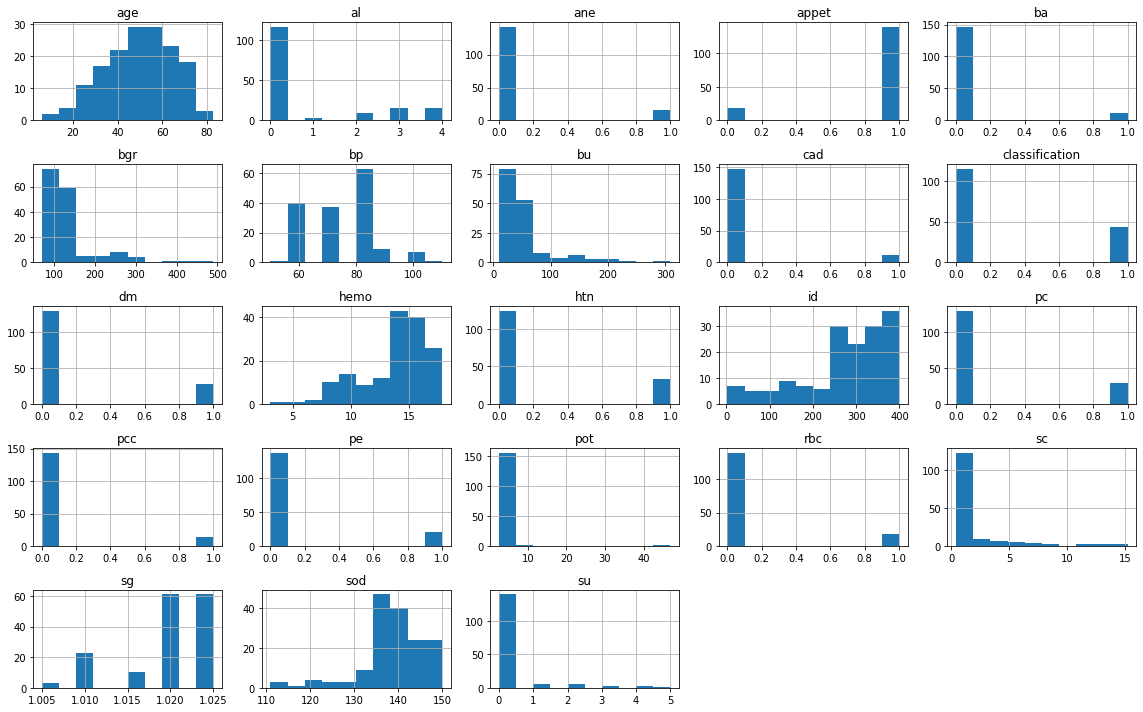

In [41]:
data.hist(figsize = (16,10))
plt.tight_layout()
plt.show()

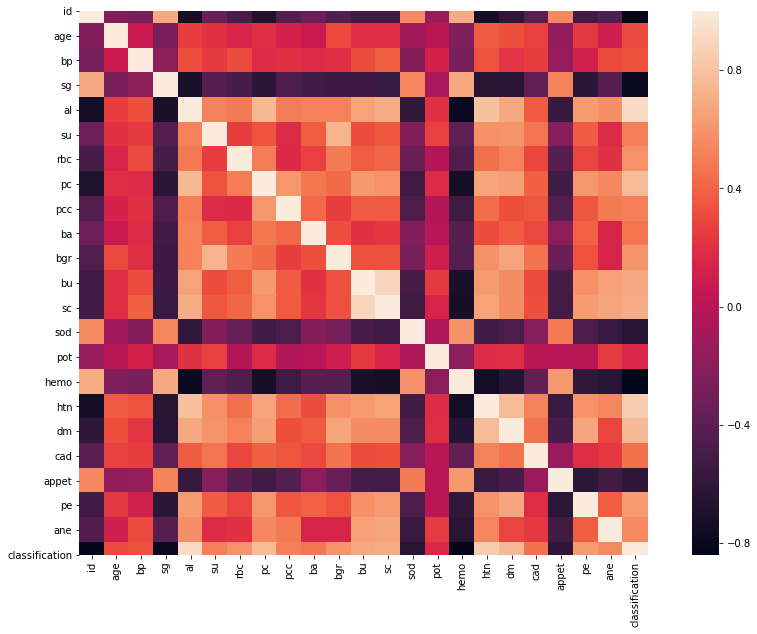

In [43]:
plt.figure(figsize = (16,10))
sns.heatmap(data.corr(),square = True)
plt.show()

In [46]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(data.drop(columns = ["classification"]),data["classification"])

Training

In [49]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 10)

In [50]:
clf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [51]:
predict = clf.predict(x_test)

### testing

In [52]:
confusion_matrix(y_test,predict)

array([[27,  0],
       [ 0, 13]], dtype=int64)

In [53]:
accuracy_score(y_test,predict)

1.0

In [55]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       1.00      1.00      1.00        13

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40

